# Step 1 : Load Dataset

In [10]:
# Import Libraries

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np

In [11]:
data_collection = pd.read_csv('data_collection.csv')

# Step 2 : Data Overview

In [12]:
print(data_collection)

        ID   column_1   column_2    column_3   column_4  column_5  column_6  \
0        1  35.940913   73.664852  36.032001  37.547395  0.012069  0.204383   
1        2  35.444034   72.893853  35.533862  37.028305  0.012069  0.204383   
2        3  37.058890   75.399594  37.152812  38.715343  0.012069  0.204383   
3        4  36.354978   74.307348  36.447116  37.979967  0.012069  0.204383   
4        5  34.298452   71.116277  34.385377  35.831518  0.012069  0.204383   
...    ...        ...         ...        ...        ...       ...       ...   
2647  2648  27.038497   59.851153  27.107023  28.247060  0.012069  0.204383   
2648  2649  27.383552   60.386568  27.452953  28.607538  0.012069  0.204383   
2649  2650  28.170277   61.607312  28.241671  29.429428  0.012069  0.204383   
2650  2651  28.032254   61.393146  28.103299  29.285236  0.012069  0.204383   
2651  2652  27.908034   61.200396  27.978764  29.155463  0.012069  0.204383   

          column_7   column_8   column_9  ...  colu

In [13]:
print(data_collection.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           2652 non-null   int64  
 1   column_1     2652 non-null   float64
 2    column_2    2652 non-null   float64
 3   column_3     2652 non-null   float64
 4   column_4     2652 non-null   float64
 5   column_5     2652 non-null   float64
 6   column_6     2652 non-null   float64
 7   column_7     2651 non-null   object 
 8   column_8     2652 non-null   float64
 9   column_9     2652 non-null   float64
 10  column_10    2652 non-null   float64
 11  column_11    2652 non-null   float64
 12  column_12    2652 non-null   float64
 13  column_13    2652 non-null   float64
 14  column_14    2640 non-null   object 
 15  column_15    2650 non-null   float64
 16  column_16    2652 non-null   object 
 17  column_17    2652 non-null   object 
 18  column_18    2652 non-null   float64
 19  column

# Step 3 : Data cleaning and Preparing

In [14]:
# Check Not a Number (NaN)

data_collection.isnull().values.any()
data_collection.isnull().sum()

ID                0
column_1          0
 column_2         0
column_3          0
column_4          0
column_5          0
column_6          0
column_7          1
column_8          0
column_9          0
column_10         0
column_11         0
column_12         0
column_13         0
column_14        12
column_15         2
column_16         0
column_17         0
column_18         0
column_19         0
column_20         0
column_21         0
column_22         0
column_23         0
column_24         0
column_25         0
column_26         0
column_27         0
column_28         0
column_29         0
column_30         0
column_31      2353
column_32         0
column_33         0
column_34         0
column_35         0
column_36         0
column_37         0
column_38         0
column_39         0
column_40         0
sugar_price       0
dtype: int64

In [15]:
# Check Data types

data_collection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           2652 non-null   int64  
 1   column_1     2652 non-null   float64
 2    column_2    2652 non-null   float64
 3   column_3     2652 non-null   float64
 4   column_4     2652 non-null   float64
 5   column_5     2652 non-null   float64
 6   column_6     2652 non-null   float64
 7   column_7     2651 non-null   object 
 8   column_8     2652 non-null   float64
 9   column_9     2652 non-null   float64
 10  column_10    2652 non-null   float64
 11  column_11    2652 non-null   float64
 12  column_12    2652 non-null   float64
 13  column_13    2652 non-null   float64
 14  column_14    2640 non-null   object 
 15  column_15    2650 non-null   float64
 16  column_16    2652 non-null   object 
 17  column_17    2652 non-null   object 
 18  column_18    2652 non-null   float64
 19  column

In [16]:
# Drop entire row
data_collection.dropna(subset=['column_7'], how='any', inplace=True)
data_collection.dropna(subset=['column_14'], how='any', inplace=True)
data_collection.dropna(subset=['column_15'], how='any', inplace=True)

# Drop entire column
data_collection.drop(columns=['column_5'], inplace=True)
data_collection.drop(columns=['column_6'], inplace=True)
data_collection.drop(columns=['column_31'], inplace=True)

# Convert object dtype to float64 dtype
data_collection['column_7'] = data_collection['column_7'].astype(str)
data_collection['column_14'] = data_collection['column_14'].astype(str)
data_collection['column_16'] = data_collection['column_16'].astype(str)
data_collection['column_17'] = data_collection['column_17'].astype(str)
data_collection['column_29'] = data_collection['column_29'].astype(str)
data_collection['column_7'] = data_collection['column_7'].str.replace(',', '').astype(float)
data_collection['column_14'] = data_collection['column_14'].str.replace(',', '').astype(float)
data_collection['column_16'] = data_collection['column_16'].str.replace(',', '').astype(float)
data_collection['column_17'] = data_collection['column_17'].str.replace(',', '').astype(float)
data_collection['column_29'] = data_collection['column_29'].replace(r'\((.*)\)', r'-\1', regex=True).astype(float)

In [17]:
# Cleaned data Overview
print(data_collection)

        ID   column_1   column_2    column_3   column_4  column_7   column_8  \
0        1  35.940913   73.664852  36.032001  37.547395    1650.6  37.692459   
1        2  35.444034   72.893853  35.533862  37.028305    1616.3  37.171364   
2        3  37.058890   75.399594  37.152812  38.715343    1615.5  38.864920   
3        4  36.354978   74.307348  36.447116  37.979967    1620.4  38.126703   
4        5  34.298452   71.116277  34.385377  35.831518    1656.0  35.969954   
...    ...        ...         ...        ...        ...       ...        ...   
2647  2648  27.038497   59.851153  27.107023  28.247060    1918.4  28.356193   
2648  2649  27.383552   60.386568  27.452953  28.607538    1933.8  28.718063   
2649  2650  28.170277   61.607312  28.241671  29.429428    1941.6  29.543128   
2650  2651  28.032254   61.393146  28.103299  29.285236    1944.3  29.398379   
2651  2652  27.908034   61.200396  27.978764  29.155463    1972.1  29.268106   

       column_9  column_10  column_11  

In [18]:
data_collection.isnull().values.any()
data_collection.isnull().sum()

ID             0
column_1       0
 column_2      0
column_3       0
column_4       0
column_7       0
column_8       0
column_9       0
column_10      0
column_11      0
column_12      0
column_13      0
column_14      0
column_15      0
column_16      0
column_17      0
column_18      0
column_19      0
column_20      0
column_21      0
column_22      0
column_23      0
column_24      0
column_25      0
column_26      0
column_27      0
column_28      0
column_29      0
column_30      0
column_32      0
column_33      0
column_34      0
column_35      0
column_36      0
column_37      0
column_38      0
column_39      0
column_40      0
sugar_price    0
dtype: int64

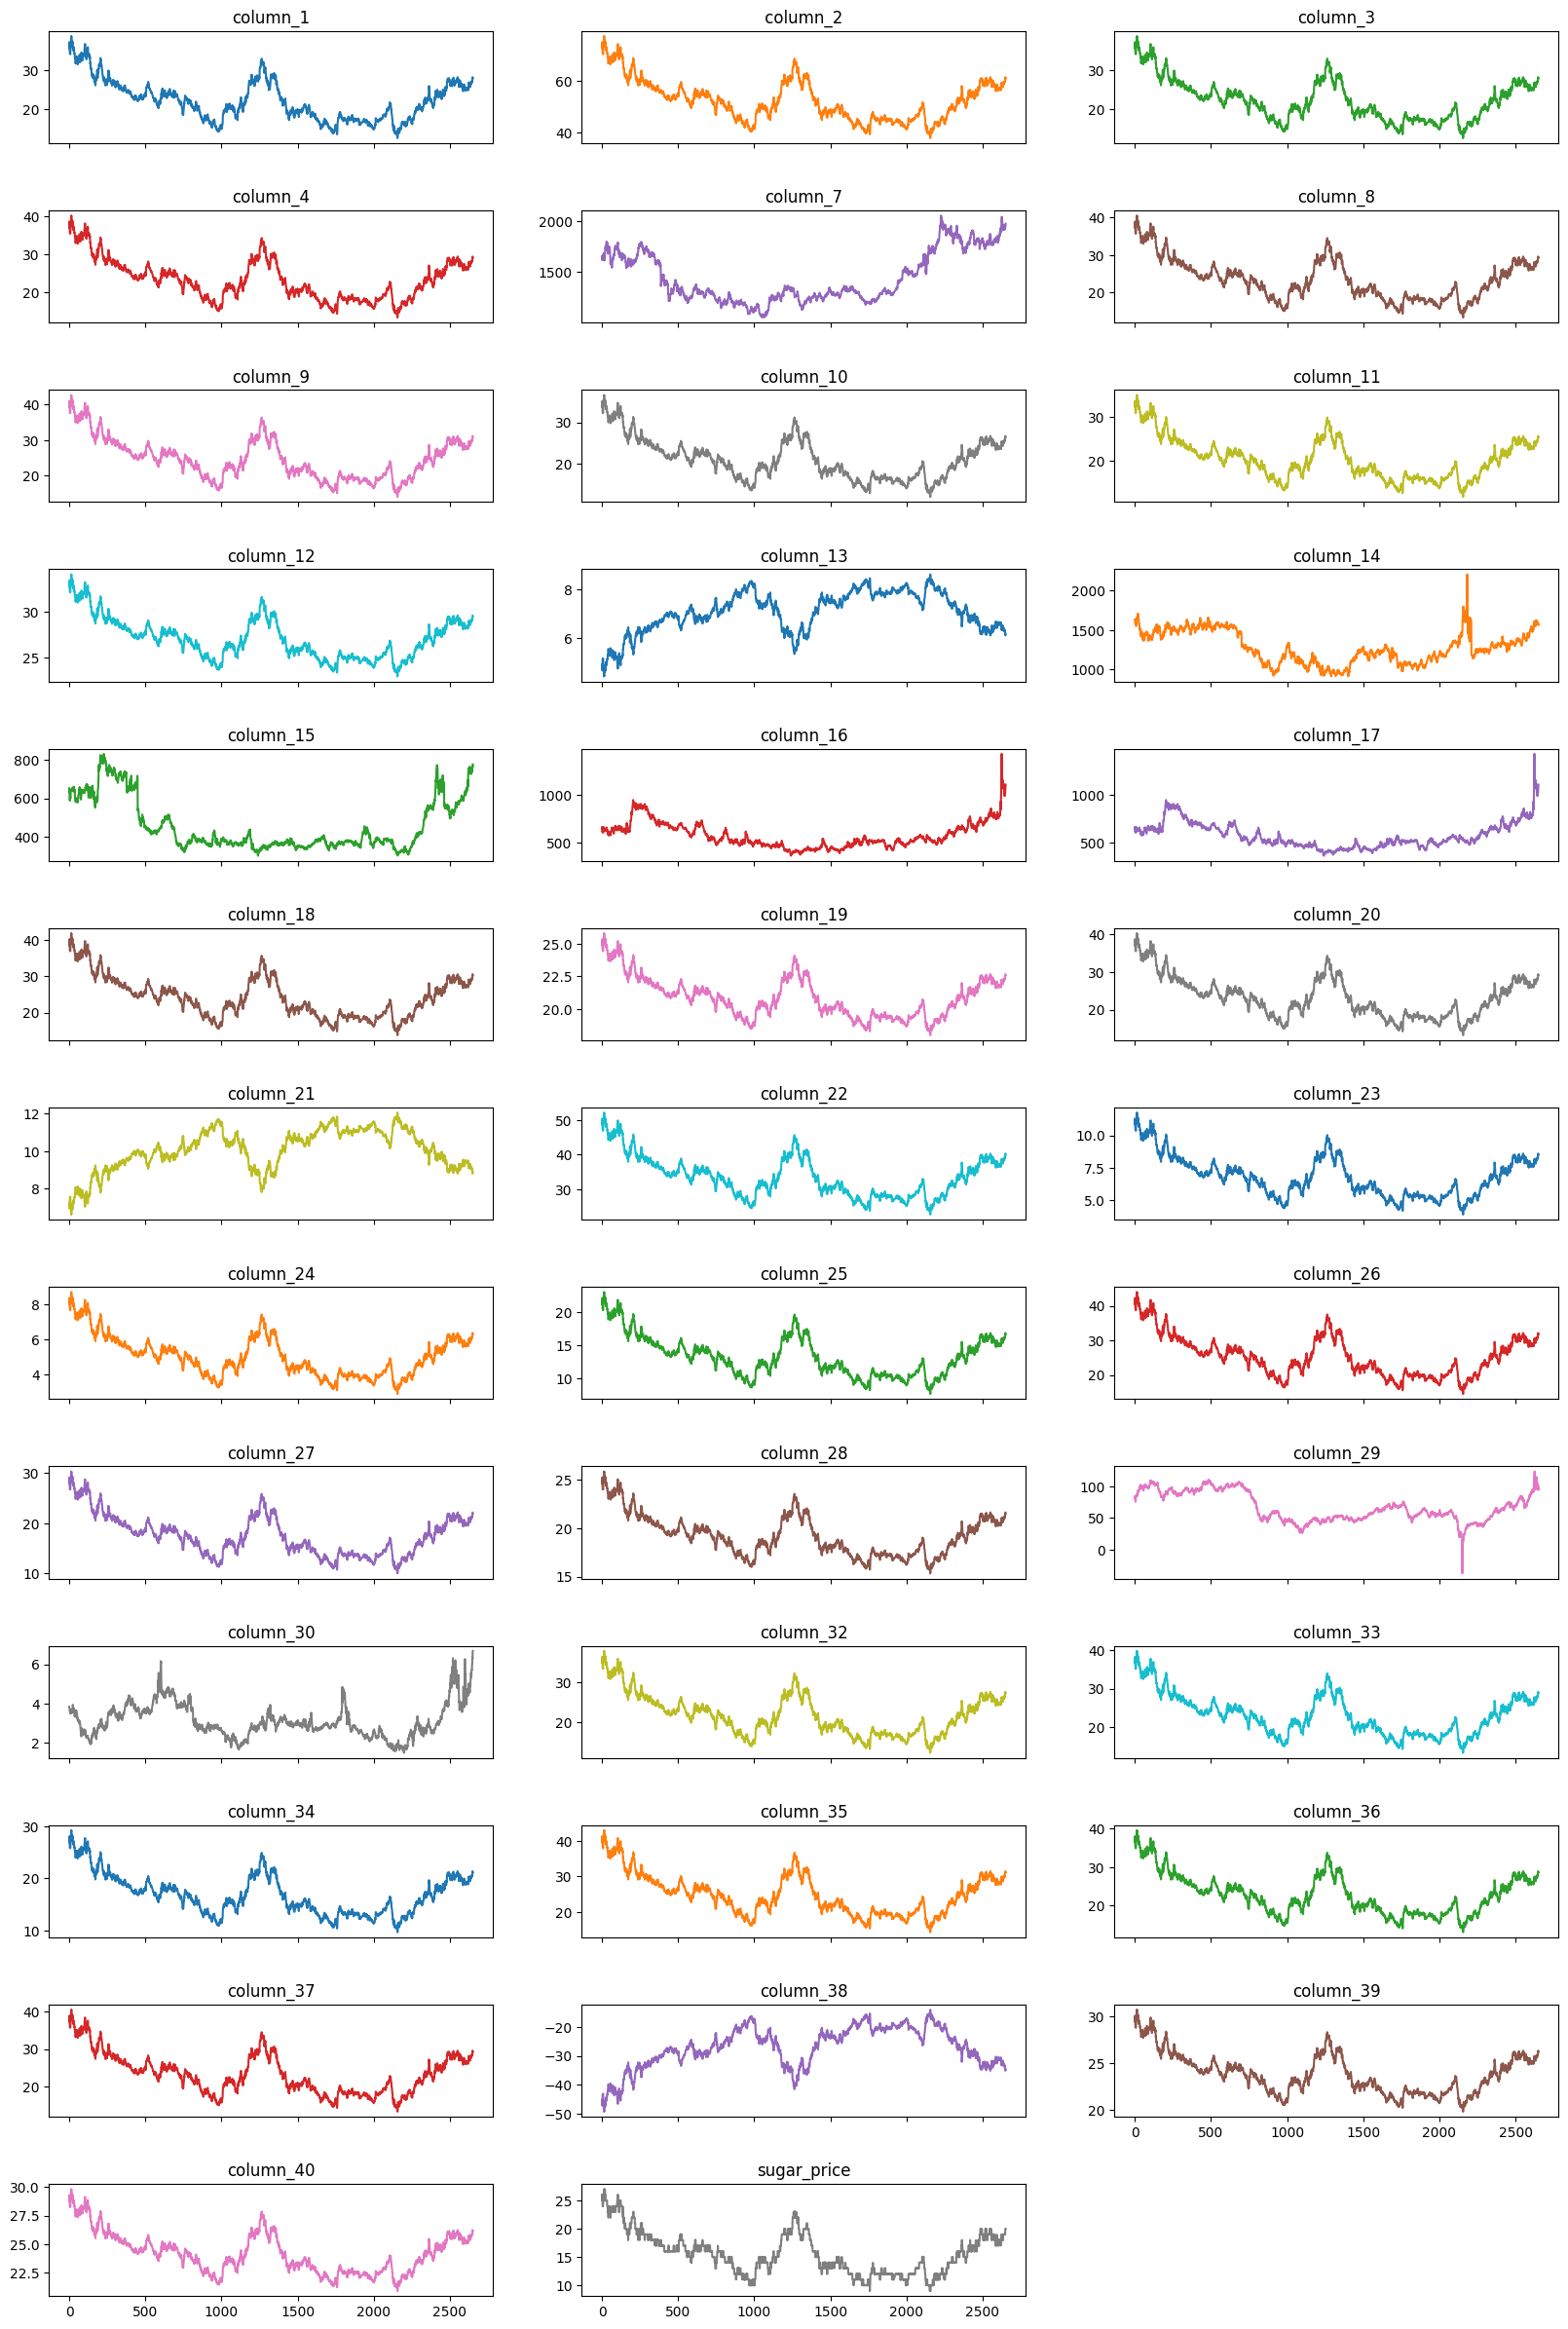

In [19]:
# Visualize each columns
data_visualize = data_collection.drop(data_collection.columns[0], axis=1)
numeric_columns = data_visualize.select_dtypes(include=[float, int]).columns
columns_per_row = 3
num_columns = len(numeric_columns)

axes = data_visualize[numeric_columns].plot(subplots=True
                                     , layout=(num_columns, 3)
                                     , figsize=(20, 90)
                                     , sharex=True
                                     , legend=False)
plt.subplots_adjust(hspace=0.6, wspace=0.2)
for ax, col in zip(axes.flat, numeric_columns) :
    ax.set_title(col)
plt.show()

In [20]:
# Invert some columns (13, 21, 38)
data_collection["column_13"] = -data_collection["column_13"]
data_collection["column_21"] = -data_collection["column_21"]
data_collection["column_38"] = -data_collection["column_38"]

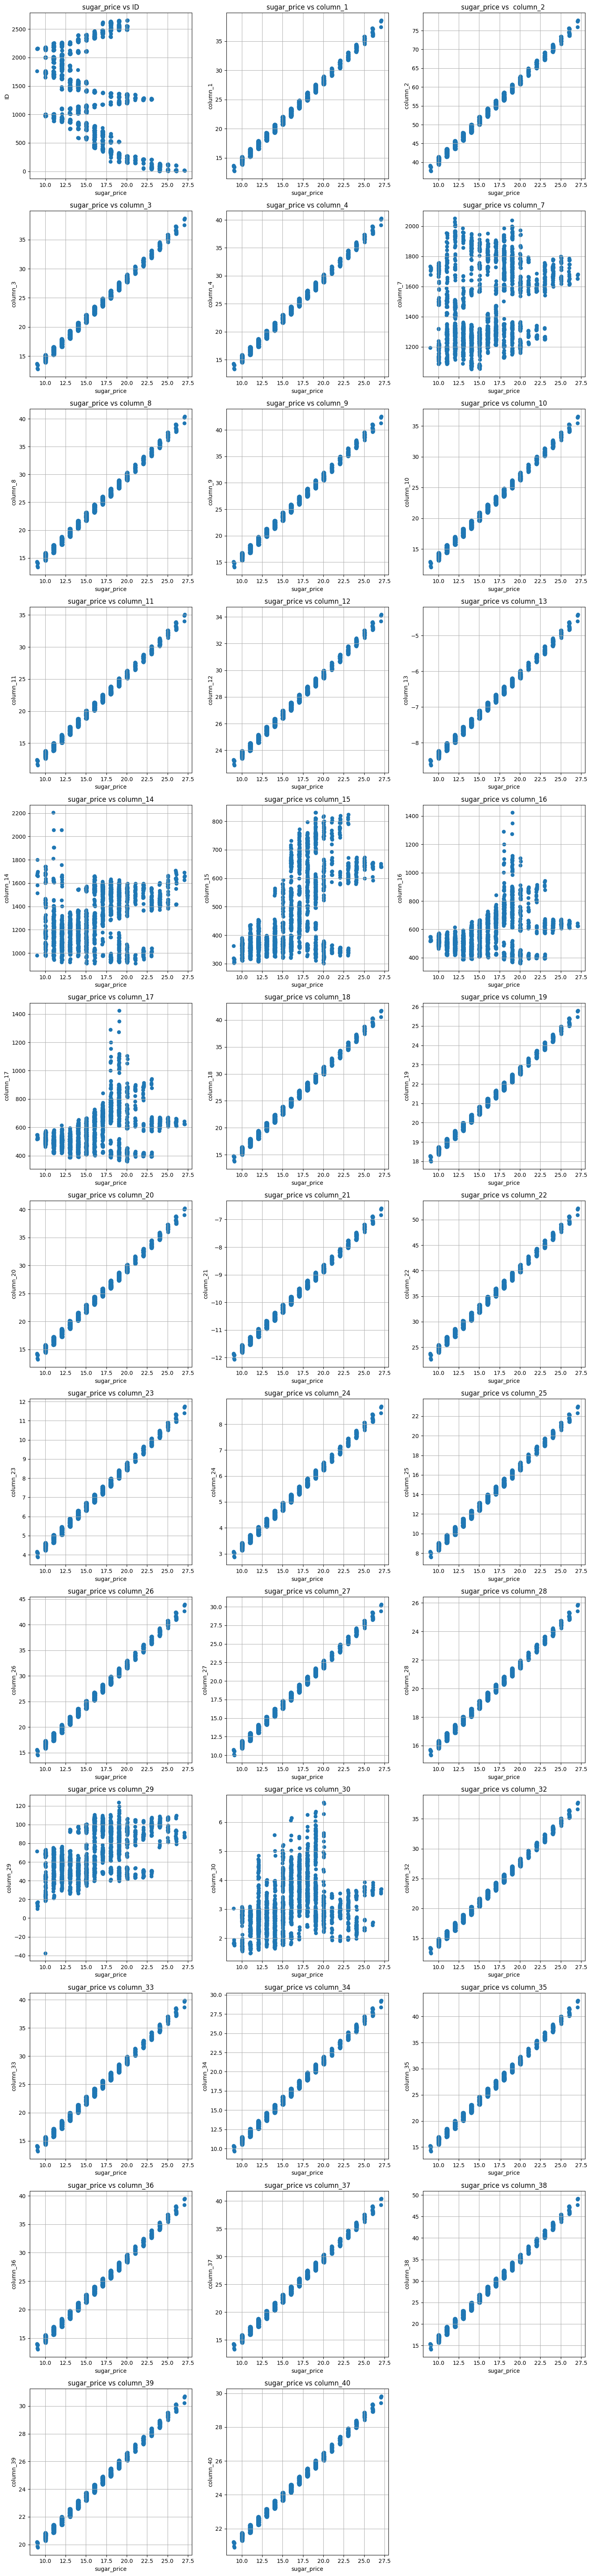

In [21]:
# Visualize 'sugar_price' vs each columns
columns_per_row = 3
num_plots = len(data_collection.columns) - 1  
num_rows = (num_plots + columns_per_row - 1) // columns_per_row 

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()

plot_index = 0
for column in data_collection.columns:
    if column != 'sugar_price':
        axes[plot_index].scatter(data_collection['sugar_price'], data_collection[column])
        axes[plot_index].set_title(f'sugar_price vs {column}')
        axes[plot_index].set_xlabel('sugar_price')
        axes[plot_index].set_ylabel(column)
        axes[plot_index].grid(True)
        plot_index += 1

if plot_index < len(axes):
    for j in range(plot_index, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Step 4 : Data Correlation

In [22]:
# Correlation Overview
without_id = data_collection.drop(data_collection.columns[0], axis=1).drop(data_collection.index[0], axis=0)

correlation_matrix = without_id.corr()
correlation_matrix

,column_1,column_2,column_3,column_4,column_7,column_8,column_9,column_10,column_11,column_12,...,column_32,column_33,column_34,column_35,column_36,column_37,column_38,column_39,column_40,sugar_price
column_1,1.000000,1.000000,1.000000,1.000000,0.331525,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996927
column_2,1.000000,1.000000,1.000000,1.000000,0.331525,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996927
column_3,1.000000,1.000000,1.000000,1.000000,0.331525,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996927
column_4,1.000000,1.000000,1.000000,1.000000,0.331525,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996927
column_7,0.331525,0.331525,0.331525,0.331525,1.000000,0.331525,0.331525,0.331525,0.331525,0.331525,...,0.331525,0.331525,0.331525,0.331525,0.331525,0.331525,0.331525,0.331525,0.331525,0.328597
column_8,1.000000,1.000000,1.000000,1.000000,0.331525,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996927
column_9,1.000000,1.000000,1.000000,1.000000,0.331525,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996927
column_10,1.000000,1.000000,1.000000,1.000000,0.331525,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996927
column_11,1.000000,1.000000,1.000000,1.000000,0.331525,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996927
column_12,1.000000,1.000000,1.000000,1.000000,0.331525,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996927


Columns dropped: [' column_2 ', 'column_3', 'column_4', 'column_8', 'column_9', 'column_10', 'column_11', 'column_12', 'column_13', 'column_17', 'column_18', 'column_19', 'column_20', 'column_21', 'column_22', 'column_23', 'column_24', 'column_25', 'column_26', 'column_27', 'column_28', 'column_32', 'column_33', 'column_34', 'column_35', 'column_36', 'column_37', 'column_38', 'column_39', 'column_40', 'sugar_price']


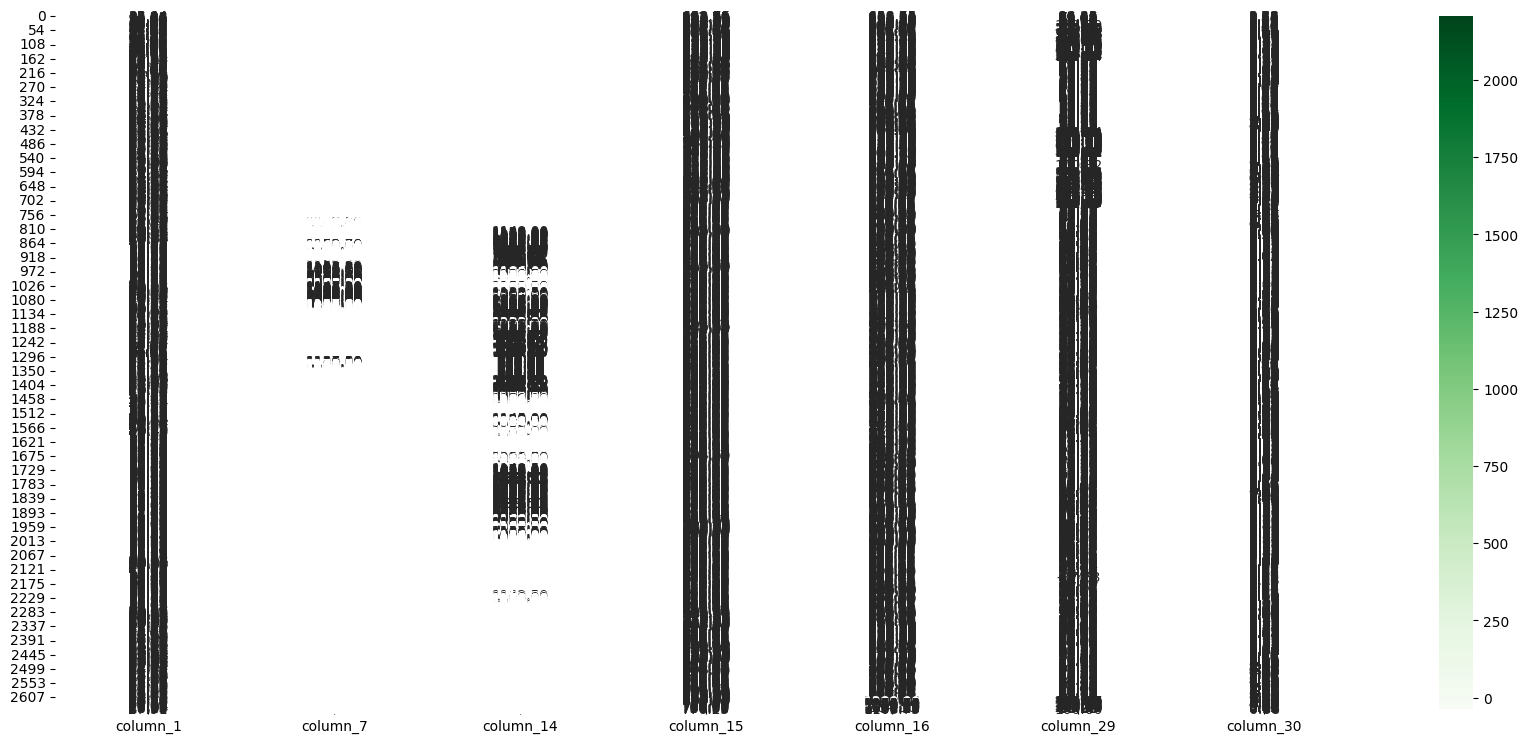

In [23]:
# Select correlated features
correlation_matrix = data_collection.corr().abs()
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.99)]
reduced = data_collection.drop(columns=to_drop)

print(f'Columns dropped: {to_drop}')

reduced = reduced.drop(data_collection.columns[0], axis=1)

plt.figure(figsize=(21, 9))
sb.heatmap(reduced, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.show()

# Step 5 : Training Model

In [24]:
# Split data into training set 80% and Test set 20%
x = reduced
y = data_collection['sugar_price']
split_index = int(0.8 * len(x))

# Split the data without shuffling
x_train = x[:split_index]
x_test = x[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

print("Dataset 100% :", data_collection.shape)
print("x train Set 80% :", x_train.shape)
print("x test Set 20% :", x_test.shape)
print("y train Set 80% :", y_train.shape)
print("y Test Set 20% :", y_test.shape)

Dataset 100% : (2637, 39)
x train Set 80% : (2109, 7)
x test Set 20% : (528, 7)
y train Set 80% : (2109,)
y Test Set 20% : (528,)


In [25]:
# Train model
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
score = metrics.r2_score(y_test, y_predict)
print(f"MAE : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
print(f"Accuracy : {score}")

MAE : 0.2611344746232228
MSE : 0.08931260921857381
RMSE : 0.2988521527755385
Accuracy : 0.9907796507497297


Training MSE : 0.0805381612811728
Test MSE : 0.08931260921857381
Cross-validation MSE: 0.08608865888069447 ± 0.008003896886423615


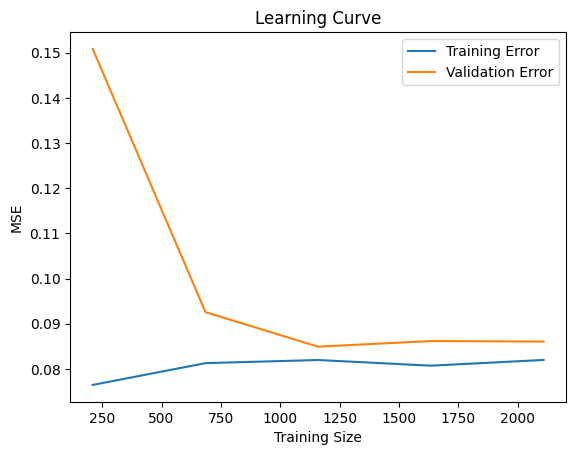

In [26]:
# Check overfitting
train_predictions = model.predict(x_train)
train_mse = metrics.mean_squared_error(y_train, train_predictions)

test_predictions = model.predict(x_test)
test_mse = metrics.mean_squared_error(y_test, test_predictions)

print(f'Training MSE : {train_mse}')
print(f'Test MSE : {test_mse}')

# Check Cross Validation
scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validation MSE: {-scores.mean()} ± {scores.std()}')

# Check Learning Curves
train_sizes, train_scores, test_scores = learning_curve(model, x, y, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Validation Error')
plt.legend()
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.show()

# Step 6 : Test model

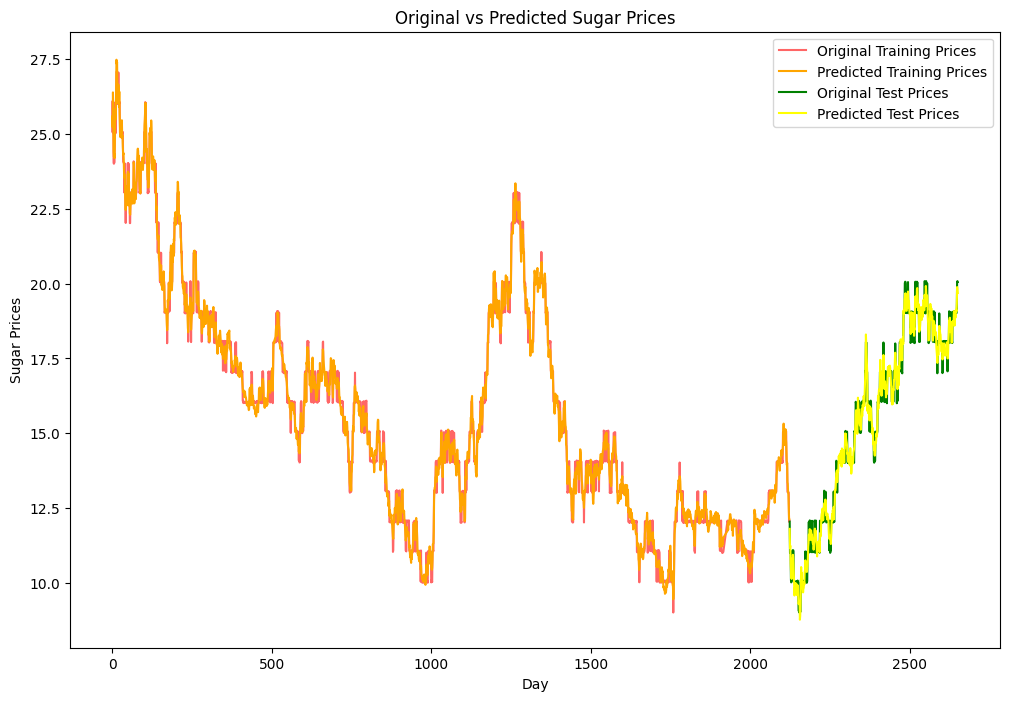

In [27]:
# Actual vs Predicted Overview
y_predict_train = model.predict(x_train)

plt.figure(figsize=(12, 8))
plt.plot(y_train.index, y_train.values, label='Original Training Prices', color='red', alpha=0.6)
plt.plot(y_train.index, y_predict_train, label='Predicted Training Prices', color='orange', linestyle='-')
plt.plot(y_test.index, y_test.values, label='Original Test Prices', color='green')
plt.plot(y_test.index, y_predict, label='Predicted Test Prices', color='yellow', linestyle='-')

plt.xlabel('Day')
plt.ylabel('Sugar Prices')
plt.title('Original vs Predicted Sugar Prices')
plt.legend()
plt.show()